In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')

In [5]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [12]:
covid.rename(columns={'ObservationDate': 'Date','Country/Region': 'Country'},inplace=True)

In [13]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7013,7014,03/19/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


# **agrupando por data**


In [15]:
mortes =covid.groupby('Date').sum()['Deaths'].reset_index()

In [16]:
mortes.tail()

,Date,Deaths
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


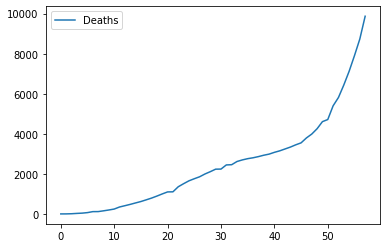

In [17]:
mortes.plot()

renomeando e organizando para aplicar no prophet

In [19]:
mortes.columns=['ds','y']
mortes.tail()

,ds,y
53,03/15/2020,6440.0
54,03/16/2020,7126.0
55,03/17/2020,7905.0
56,03/18/2020,8733.0
57,03/19/2020,9867.0


In [20]:
mortes['ds']=pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
53,2020-03-15,6440.0
54,2020-03-16,7126.0
55,2020-03-17,7905.0
56,2020-03-18,8733.0
57,2020-03-19,9867.0


Previsão de mortes da covid-19 no mundo

In [22]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=7)
futuro.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26


In [23]:
previsao = m.predict(futuro)
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
60,2020-03-22,9560.144945,8901.022337,10124.276099,9474.023068,9651.464683,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,-46.535627,0.0,0.0,0.0,9513.609318
61,2020-03-23,9962.870929,9304.273574,10576.052254,9830.088198,10105.720692,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,-34.120435,0.0,0.0,0.0,9928.750494
62,2020-03-24,10365.596913,9726.060767,10990.029389,10169.669321,10557.995192,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,-5.455514,0.0,0.0,0.0,10360.141398
63,2020-03-25,10768.322897,10141.709415,11437.891884,10509.648538,11006.701263,59.363347,59.363347,59.363347,59.363347,59.363347,59.363347,0.0,0.0,0.0,10827.686244
64,2020-03-26,11171.048881,10552.425187,11939.304865,10854.589994,11484.375417,110.821693,110.821693,110.821693,110.821693,110.821693,110.821693,0.0,0.0,0.0,11281.870574


In [25]:
previsao[['ds','yhat_lower','yhat','yhat_upper']].tail(7)

,ds,yhat_lower,yhat,yhat_upper
58,2020-03-20,8070.303767,8708.340669,9333.110903
59,2020-03-21,8512.009651,9119.697805,9748.899098
60,2020-03-22,8901.022337,9513.609318,10124.276099
61,2020-03-23,9304.273574,9928.750494,10576.052254
62,2020-03-24,9726.060767,10360.141398,10990.029389
63,2020-03-25,10141.709415,10827.686244,11437.891884
64,2020-03-26,10552.425187,11281.870574,11939.304865


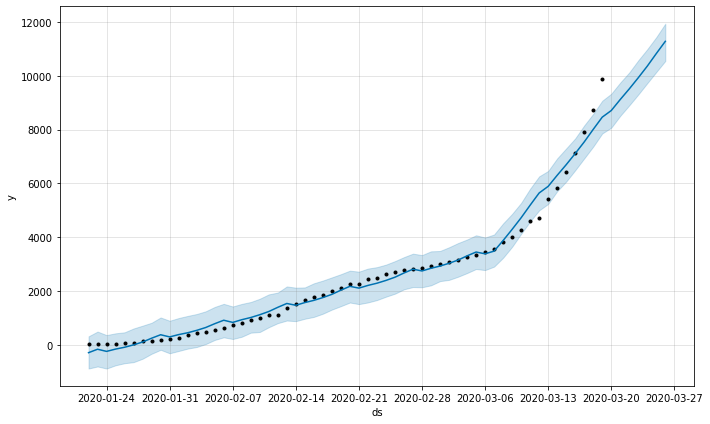

In [27]:
confirmed_forecast_plot = m.plot(previsao)